# Graph Lab

## Header information:

  - Author #1: Adam Podolak (podola2@mcmaster.ca)
  - Author #2: Justin Ho (hoj66@mcmaster.ca)
  - Gitlab URL: https://gitlab.cas.mcmaster.ca/podola2/l1-graph-lab
  - Avenue to Learn group name: Group 58

In [57]:
#Loading the graph from the CSV files
from GraphFactory import *
from graph import *

def importGraph():
    connections = '../_dataset/london.connections.csv'
    stations = '../_dataset/london.stations.csv'

    g = GraphFactory()
    connections_graph = g.build_graph("connections")
    edges = connections_graph.format_csv_file(connections)
    size = connections_graph.find_max(stations)

    graph = EdgeGraph(size)
    graph.build_edgeGraph(edges, size)

    return graph

In [58]:
#Computing the Metrics
from MetricsExtractor import *
from graph import *

graph = importGraph()

selector = Selector()

def getNumNodes(graph):
    selector.setMetricsExtractor(GetNumberOfNodes())
    num_nodes = selector.executeMetricsExtractor(graph)
    return num_nodes


def getNumEdges(graph):
    selector.setMetricsExtractor(GetNumberOfEdges())
    num_edges = selector.executeMetricsExtractor(graph)
    return num_edges

def getAverageDegreeNodes(graph):
    selector.setMetricsExtractor(GetAverageDegreeNodes())
    avg_dg_nodes = selector.executeMetricsExtractor(graph)
    return avg_dg_nodes


def getDegreeDistribution(graph):
    selector.setMetricsExtractor(GetDegreeDistribution())
    node_degree_distribution = selector.executeMetricsExtractor(graph)
    return node_degree_distribution

def getDegreeOfNode(graph, stationNumber):
    dg_dist = getDegreeDistribution(graph)
    node_dg = dg_dist[stationNumber - 1]
    return node_dg

def main():
    print("Number of nodes in graph: " + str(getNumNodes(graph)))
    print("Number of edges in graph: " + str(getNumEdges(graph)))
    print("Average degree of the nodes: " + str(getAverageDegreeNodes(graph)))
    print("Degree distribution (modelled as an array \nwhere the stations are represented by the indices and the value at a specific index is the degree of the station/node): \n" + str(getDegreeDistribution(graph)))
    print("\nRetrieving different node degrees: \nDegree of station 11: " + str(getDegreeOfNode(graph, 11)))
    print("Degree of station 21: " + str(getDegreeOfNode(graph, 21)))
    print("Degree of station 14: " + str(getDegreeOfNode(graph, 14)))
    print("Degree of station 247: " + str(getDegreeOfNode(graph, 247)))

main()

Number of nodes in graph: 303
Number of edges in graph: 406
Average degree of the nodes: 2
Degree distribution (modelled as an array 
where the stations are represented by the indices and the value at a specific index is the degree of the station/node): 
[5, 3, 4, 2, 2, 1, 2, 2, 2, 2, 10, 2, 6, 6, 3, 2, 4, 4, 1, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 1, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 3, 2, 2, 4, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 7, 4, 2, 2, 4, 2, 2, 1, 2, 5, 3, 2, 2, 8, 1, 6, 6, 2, 6, 3, 4, 4, 2, 2, 2, 6, 2, 2, 2, 2, 6, 2, 2, 6, 2, 2, 5, 2, 2, 2, 1, 3, 3, 2, 2, 2, 2, 1, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 12, 2, 2, 2, 2, 2, 4, 1, 2, 3, 2, 8, 4, 2, 2, 2, 4, 2, 2, 6, 1, 4, 8, 3, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 6, 2, 2, 0, 2, 2, 6, 8, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 1, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 5, 2, 2, 1, 4, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 1, 4, 4, 2, 4, 4

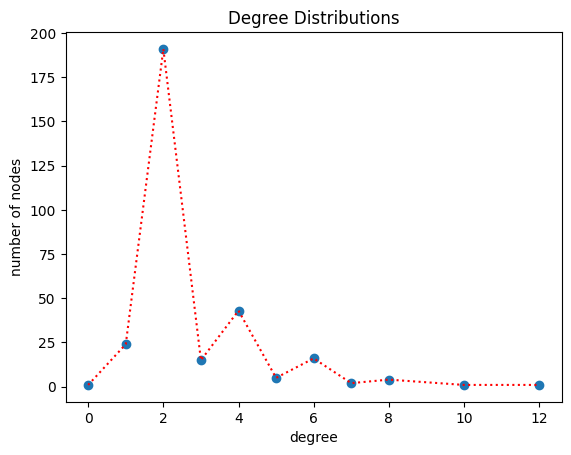

In [59]:
#Graphing the Degree Distributions 
import matplotlib.pyplot as plt

graph = importGraph()

def getX(graph): #x axis is the degrees
    deg_dist = getDegreeDistribution(graph)
    deg_dist.sort()
    deg_dist = list(dict.fromkeys(deg_dist))
    return deg_dist

def getY(graph): #y axis is number of nodes with such degree
    deg_dist = getDegreeDistribution(graph)
    degrees = getX(graph)
    
    num_nodes = []
    
    for d in degrees:
        num_nodes.append(0)
    
    
    for i in range(0, len(degrees)):
        count = 0
        for j in range(0, len(deg_dist)):
            if deg_dist[j] == degrees[i]:
                count += 1
                num_nodes[i] = count
        count = 0
    
    return num_nodes

plt.plot(getX(graph), getY(graph), 'o')
plt.plot(getX(graph), getY(graph), 'r:')
plt.title("Degree Distributions")
plt.xlabel('degree')
plt.ylabel('number of nodes')
plt.show()